# Cellular Automata
This is our week 5 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [122]:
import matplotlib.pyplot as plt
import numpy as np

## Counting: how many unique states for a 3-cell neighbourhood?
Wolfram's simple CA's use a 3-cell neighbourhood, where each cell is "on" or "off".
How many possible unique neighbourhood states are there?

In [123]:
size_of_neighbourhood = 3            # for Wolfram's set of simple CA's
n_states_for_one_cell = 2            # on or off
n_neighbourhood_states = n_states_for_one_cell ** size_of_neighbourhood    # 2**3 == 8

print('Number of unique neighbourhood states for {n_state} state CA with neighbourhood size {n_size}: {n_rules}'.format(
    n_state=n_states_for_one_cell, n_size=size_of_neighbourhood, n_rules=n_neighbourhood_states
))

bit = (0,1)
states = [(i,j,k) for i in bit for j in bit for k in bit]
states

Number of unique neighbourhood states for 2 state CA with neighbourhood size 3: 8


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

## Representation for a 'rule'
An efficient way to represent one "rule" is as a list of the 8 possible output states.
* if we interpet each neighbourhood state as an "index" into this array, we can directly look-up the state change for any given neighbourhood!
* the 'bits' in the rule are reversed so the output for neighbourhood [0,0,0] is at index 0 in the rule.

In [124]:
bin_110 = [0,1,1,0,1,1,1,0]     # binary encoding for 110
rule_110 =  bin_110[::-1]       #  reversed!
neighbourhood = [1,0,1]         # use binary code --> '101' == 1*2**2 + 0*2**1 + 1*2**0 = 5 <-- to get rule index
index = neighbourhood[0]*4 + neighbourhood[1]*2 + neighbourhood[2]
next_state = rule_110[index]
print("Rule 110:", rule_110)
print('next state for {neighbourhood}, encoded at index {index}, is: {next_state}'.format(
    neighbourhood=neighbourhood, index=index, next_state=next_state
))

Rule 110: [0, 1, 1, 1, 0, 1, 1, 0]
next state for [1, 0, 1], encoded at index 5, is: 1


## Counting: how many rules?
If a rule set can be encoded with 8 "bits", then how many unique rule sets are there?

In [125]:
n_rules = n_states_for_one_cell ** n_neighbourhood_states
print('Number of rules for {n_state} state CA with neighbourhood size {n_size}: {n_rules}'.format(
    n_state=n_states_for_one_cell, n_size=size_of_neighbourhood, n_rules=n_rules
))

rules = [(b0,b1,b2,b3,b4,b5,b6,b7)
            for b0 in bit for b1 in bit for b2 in bit for b3 in bit for b4 in bit for b5 in bit for b6 in bit for b7 in bit
        ]
rules

Number of rules for 2 state CA with neighbourhood size 3: 256


[(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 0, 1, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0, 1, 0, 0),
 

## Binary to Decimal
We 'encode' neighbourhood 'states' as a 3-bit binary number.  Convert to decimal so we can use it as an index.

In [126]:
neighbourhood = [1,0,1]
index = neighbourhood[0]*4 + neighbourhood[1]*2 + neighbourhood[2]

def bin_to_dec1(a):
  """ convert binary sequence a to decimal using "brute force" """
  dec = 0
  for i, bit in enumerate(a[::-1]):
    dec += 2**i * bit
  return dec
assert bin_to_dec1([1,0,1]) == 5

def bin_to_dec2(a):
  """ convert binary sequence a to decimal using accumulator """
  dec = 0
  for bit in a:
    dec = dec*2 + bit
  return dec
assert bin_to_dec2([1,0,1]) == 5

PLACES = [2**8, 2**7, 2**6, 2**5, 2**4, 2**3, 2**2, 2**1, 2**0]   # ordering matches binary sequence ordering!
def bin_to_dec3(a):
  """ convert binary sequence a to decimal using "vector dot product" """
  places = PLACES[-len(a):]
  print('performing dot product on:', places, '*', a)
  return sum(a[i]*places[i] for i in range(len(a)))
assert bin_to_dec3([1,0,1]) == 5

def dot_product(a, w):
    """ return the dot product of vectors a and w, to length of w """
    return sum(a[i]*w[i] for i in range(len(w)))
assert dot_product([0,1,1], [4,2,1]) == 3

def bin_to_dec4(a):
    """ Final version, usnig dot_product """
    places = PLACES[-len(a):]
    return dot_product(a, places)
assert bin_to_dec4([1,0,1]) == 5


performing dot product on: [4, 2, 1] * [1, 0, 1]


## numpy.array
numpy (numerical python) array class defines vector (and matrix) operations to simplify vector logic.
If we assume the input a for dot_product is a numpy.array, the code is greatly simplified:

In [127]:
def dot_product(a, w):
    """ return the dot product of numpy.array a and vector w, to length of w """
    return sum(a * w)   # numpy.array defines multiplication as vector multiplication
assert dot_product(np.array([0,1,1]), [4,2,1]) == 3

## Sliding dot product algorithm
Finally, we are ready to compute the "rule" indexes for an entire row, using a sliding-window algorithm

In [128]:
def sliding_dot_product(row, window):
    """ Compute next row from dot product at each window pos. """
    N = len(window)
    cols = len(row)-N+1
    c = [ dot_product(row[k:k+N], window) for k in range(cols) ]
    return np.array(c)
assert all( sliding_dot_product(np.array([1,1,0,0,1,0,0,0]), [4,2,1]) == [6, 4, 1, 2, 4, 0] )

row = np.array([1,1,0,0,1,0,0,0])
window = [4,2,1]
print('Indexes to choose next state for {row} are: {next}'.format(
    row=row, next=sliding_dot_product(row, window)
))

Indexes to choose next state for [1 1 0 0 1 0 0 0] are: [6 4 1 2 4 0]


## Apply the rule
Phew!  Now we can use ANY of Wolfram's 8-bit rules as a "look up table", using the indexes above to "look up" the cell's next state
 * Tip: if the rule is an np.array, we can do vector indexing:  next_row=rule[indexes]
 * Tip: use np.pad(array, n, mode='constant') to pad array with n zeros on either end, or mode='wrap' to "wrap" the array ends.

In [129]:
def next_state(row, rule):
    """ return an np.array for the next state from current row for given 8-bit rule """
    indexes = sliding_dot_product(row, [4,2,1])
    next_row = [rule[i] for i in indexes]
    return np.array([0]+ next_row + [0])  # pad with zeros so output row is same length as input
assert all( next_state(np.array([1,1,0,0,1,0,0,0]), rule_110) == [0, 1, 0, 1, 1, 0, 0, 0] )

row = np.array([0,0,1,1,1,0,0,0,1,1,0])
print("Rule 110:", rule_110)
print('  next state for {row} is: {next_state}'.format(
    row=row, next_state=next_state(row, rule_110)
))

Rule 110: [0, 1, 1, 1, 0, 1, 1, 0]
  next state for [0 0 1 1 1 0 0 0 1 1 0] is: [0 1 1 0 1 0 0 1 1 1 0]


## Displaying progression of a 1D CA over time
Since we display the CA state along x-axis, we can use the 'y-axis' to display its progress through time
 * this creates a 2D array that can be displayed as an image
 * use data type np.uint8 for cells - 2D array of unsigned 8-bit integers is a basic image format
 * initialize CA with 1 "on" cell in middle for first row to emulate Wolfram's original experiments

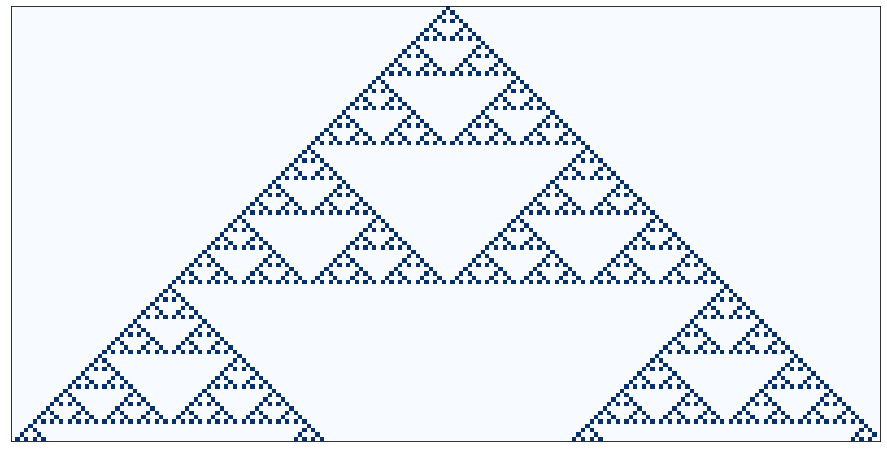

In [130]:
def generate_ca(cells, rows, rule):
    """ Generate a CA with given number os cells, showing progression of rule for given number of rows """
    array = np.zeros((rows, cells), dtype=np.uint8)  # an array of cells for each row
    array[0, cells//2] = 1                           # place a 1 in middle of first row
    for r in range(1, rows):
        array[r] = next_state(array[r-1], rule)
    return array

def draw(ca):
    """ Draws the CA using pyplot.imshow """
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.imshow(ca, cmap='Blues', interpolation=None)
    # turn off axis tick marks
    plt.xticks([])
    plt.yticks([])
    return plt.show()

bin_90 = [0,1,0,1,1,0,1,0]
rule_90 = bin_90[::-1]
ca = generate_ca(200, 100, rule_90)
draw(ca)